<a href="https://colab.research.google.com/github/bryaanabraham/Wandering_Guardian/blob/main/GPS_Data_Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install gpxpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 1.6 MB/s eta 0:00:00


In [33]:
!pip install rdp

  Preparing metadata (setup.py) ... done
  Created wheel for rdp: filename=rdp-0.8-py3-none-any.whl size=4587 sha256=57dde58b485287e00aeecc0b8e6de3e08cc7a36721a77cbf53fc8160e63539be
  Stored in directory: /root/.cache/pip/wheels/5d/12/ec/0fc50553af000b9c3d2c74b9f77a01ae4bfe856e9917ac239c
Successfully built rdp


In [34]:
import gpxpy
import pandas as pd
import matplotlib.pyplot as plt
from rdp import rdp

In [22]:
with open('./ONER_2023_FN.gpx') as fh:
  gpx_file = gpxpy.parse(fh)

In [25]:
segment = gpx_file.tracks[0].segments[0]
coords = pd.DataFrame([
    {'lat': p.latitude,
     'lon': p.longitude,
     'ele': p.elevation,
     'time': p.time,
     } for p in segment.points])
coords.set_index('time', drop=True, inplace=True)
coords.head()

,lat,lon,ele
time,,,
None,50.73446,-2.90010,3.400000
None,50.73446,-2.90010,3.400000
None,50.73425,-2.89969,2.200000
None,50.73431,-2.89961,2.175167
None,50.73427,-2.89954,2.156287


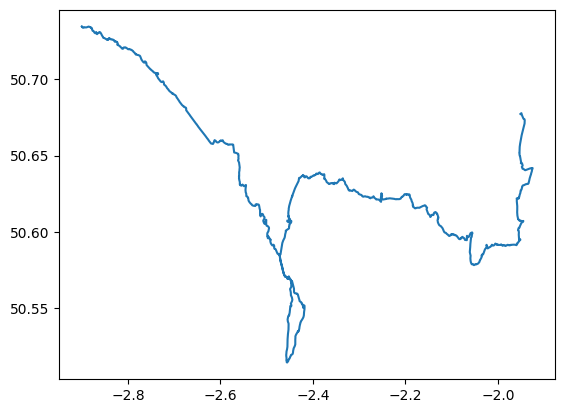

In [27]:
plt.plot(coords['lon'].values, coords['lat'].values)

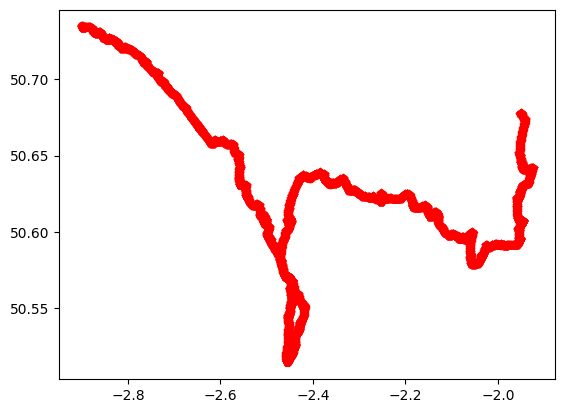

In [30]:
plt.plot(coords['lon'].values, coords['lat'].values, 'rp')

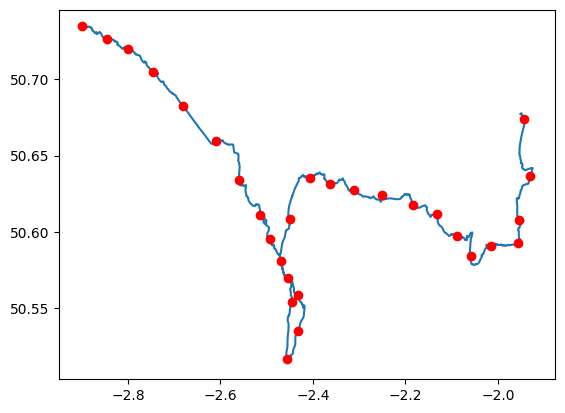

In [46]:
plt.plot(coords['lon'].values, coords['lat'].values)
plt.plot(coords['lon'].values[::150], coords['lat'].values[::150], 'ro')

4223 points reduced to 1030


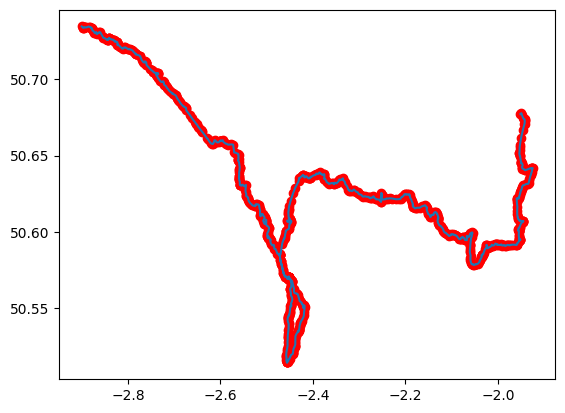

In [53]:
simple_coords = rdp(coords[['lon', 'lat']].values, epsilon = 1e-4)
print("{} points reduced to {}".format(coords.shape[0], simple_coords.shape[0]))
plt.plot(simple_coords[:,0], simple_coords[:,1],'ro')
plt.plot(simple_coords[:,0], simple_coords[:,1]);